## belosgraficos instagram.com/belosgraficos/
### Notebook para a criação de gráficos sobre o livro Como Mentir com Estatística.
Comentários estão em português - Comments are in Portuguese

Notebook criado utilizando o Kaggle

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Lendo o arquivo CSV - Atenção para o caminho do arquivo
file_path = '../input/did-it-rain-in-seattle-19482017/seattleWeather_1948-2017.csv'
dataset_seatle = pd.read_csv(file_path, 
                             sep = ",")

dataset_seatle.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
# Removendo valores ausentes
dataset_seatle.dropna(axis=0, how='any', inplace=True)
dataset_seatle.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [5]:
# Convertendo de graus F para graus C
dataset_seatle['TMAX'] = (dataset_seatle['TMAX'] - 32) * 5/9
dataset_seatle['TMIN'] = (dataset_seatle['TMAX'] - 32) * 5/9

dataset_seatle.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,10.555556,-11.913580,True
1,1948-01-02,0.59,7.222222,-13.765432,True
2,1948-01-03,0.42,7.222222,-13.765432,True
3,1948-01-04,0.31,7.222222,-13.765432,True
4,1948-01-05,0.17,7.222222,-13.765432,True


In [6]:
# Adicionando uma nova coluna 'Mes' contendo apenas o mês de cada data
dataset_seatle['Ano'] = pd.to_datetime(dataset_seatle['DATE'], format='%Y/%m/%d').dt.year

# Obtendo a temperatura mínima registrada em cada ano
minima_seatle = dataset_seatle.groupby('Ano')['TMIN'].min()

# Obtendo a temperatura máxima registrada em cada ano
maxima_seatle = dataset_seatle.groupby('Ano')['TMAX'].max()

# Obtendo a temperatura média em cada ano
media_maxima_seatle = dataset_seatle.groupby('Ano')['TMAX'].mean()
media_minima_seatle = dataset_seatle.groupby('Ano')['TMIN'].mean()
media_seatle = (media_maxima_seatle+media_minima_seatle)/2

# Adicionando novas colunas com a mínima e máxima temperatura registrada
dataset_seatle['Min_ano'] = dataset_seatle['Ano'].map(minima_seatle)
dataset_seatle['Max_ano'] = dataset_seatle['Ano'].map(maxima_seatle)
dataset_seatle['Med_ano'] = dataset_seatle['Ano'].map(media_seatle)

# Verificando
dataset_seatle.head()

,DATE,PRCP,TMAX,TMIN,RAIN,Ano,Min_ano,Max_ano,Med_ano
0,1948-01-01,0.47,10.555556,-11.913580,True,1948,-17.469136,31.111111,1.919483
1,1948-01-02,0.59,7.222222,-13.765432,True,1948,-17.469136,31.111111,1.919483
2,1948-01-03,0.42,7.222222,-13.765432,True,1948,-17.469136,31.111111,1.919483
3,1948-01-04,0.31,7.222222,-13.765432,True,1948,-17.469136,31.111111,1.919483
4,1948-01-05,0.17,7.222222,-13.765432,True,1948,-17.469136,31.111111,1.919483


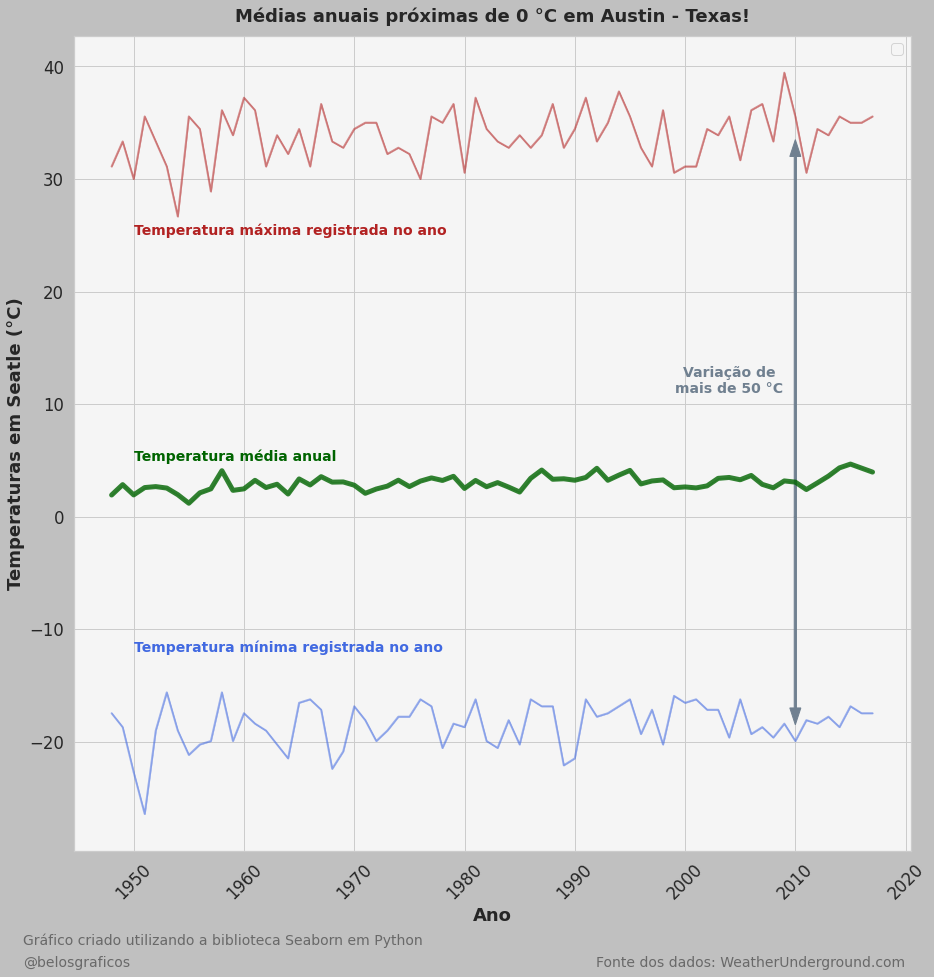

In [49]:
# Definindo tema do gráfico e cores de fundo
sns.set_theme(style="whitegrid",
              font_scale = 1.5,
              rc={'figure.facecolor':'silver', # Cor de fundo da figura
                  'axes.facecolor':'whitesmoke'})  # Cor de fundo dos eixos

sns.set_context("notebook", font_scale = 1.5)

# Criando uma figura, com tamanho 15x15
plt.figure(figsize=(15, 15))


# Plotando os dados com um gráfico de barras
fig = sns.lineplot(data=dataset_seatle,
                  x='Ano',
                  y = 'Min_ano',
                  alpha = 0.5,
                  linewidth = 2,
                  color='royalblue')

sns.lineplot(data=dataset_seatle,
                  x='Ano',
                  y = 'Max_ano',
                  alpha = 0.5,
                  linewidth = 2,
                  color='firebrick')

sns.lineplot(data=dataset_seatle,
                  x='Ano',
                  y = 'Med_ano',
                  alpha = 0.8,
                  linewidth = 5,
                  color='darkgreen')


# Tamanho da legenda
plt.legend(fontsize  = 15)

# Configurações do eixo X
plt.xticks(rotation=45)
plt.xlabel("Ano", weight='semibold')

# Configurações do eixo Y
plt.ylabel("Temperaturas em Seatle (°C)", weight='semibold')

# Configurações do título e subtítulo
plt.title("Médias anuais próximas de 0 °C em Austin - Texas!", 
          y=1.01, fontsize=18, 
          weight='semibold', horizontalalignment='center')

# Textos auxiliares no gráfico
plt.text(2020, -40, "Fonte dos dados: WeatherUnderground.com", 
         horizontalalignment='right',
         va = 'baseline',
         size=14, color='dimgray')

plt.text(1940, -38, "Gráfico criado utilizando a biblioteca Seaborn em Python", 
         horizontalalignment='left',
         va = 'baseline',
         size=14, color='dimgray')

plt.text(1940, -40, "@belosgraficos", 
         horizontalalignment='left',
         va = 'baseline',
         size=14, color='dimgray')

plt.text(1950, 25, "Temperatura máxima registrada no ano", 
         horizontalalignment='left',
         va = 'baseline', weight='semibold',
         size=14, color='firebrick')
plt.text(1950, -12, "Temperatura mínima registrada no ano", 
         horizontalalignment='left',
         va = 'baseline', weight='semibold',
         size=14, color='royalblue')

plt.text(1950, 5, "Temperatura média anual", 
         horizontalalignment='left',
         va = 'baseline', weight='semibold',
         size=14, color='darkgreen')

plt.arrow(2010, 0, 0, 32, color='slategray', head_width = 1, width = 0.2)
plt.arrow(2010, 0, 0, -17, color='slategray', head_width = 1, width = 0.2)
plt.text(2004, 11, "Variação de\nmais de 50 °C", 
         horizontalalignment='center',
         va = 'baseline', weight='semibold',
         size=14, color='slategray')


# Salva a figura e exibe o gráfico no console
plt.savefig("CMCE_2_media.png")